# Numpy Basics 2

<!--TABLE OF CONTENTS-->
Contents:
- [Numpy Basics 2](#Numpy-Basics-2)
    - [Pseudorandom Number Generation](#Pseudorandom-Number-Generation)
    - [Fast Element-Wise Array Functions](#Fast-Element-Wise-Array-Functions)
    - [Array-Oriented Programming With Arrays](#Array-Oriented-Programming-With-Arrays)
    - [Conditional Logic as Array Operations](#Conditional-Logic-as-Array-Operations)
    - [Mathematical Statistical Methods](#Mathematical-Statistical-Methods)
      - [Functions Overview](#Functions-Overview)
    - [Methods For Boolean Arrays](#Methods-For-Boolean-Arrays)
    - [Sorting](#Sorting)
    - [Unique and Other Set Logic](#Unique-and-Other-Set-Logic)
      - [Functions Overview](#Functions-Overview)
    - [File Input and Output with Arrays](#File-Input-and-Output-with-Arrays)
    - [1. Saving and Loading Arrays in Binary Format](#1.-Saving-and-Loading-Arrays-in-Binary-Format)
      - [`np.save()`](#`np.save()`)
      - [`np.load()`](#`np.load()`)
      - [`np.savez()`](#`np.savez()`)
      - [`np.load()`](#`np.load()`)
    - [2. Saving and Loading Arrays in Text Format](#2.-Saving-and-Loading-Arrays-in-Text-Format)
      - [`np.savetxt()`](#`np.savetxt()`)
      - [`np.loadtxt()`](#`np.loadtxt()`)
    - [3. Reading and Writing Arrays to/from CSV Files](#3.-Reading-and-Writing-Arrays-to/from-CSV-Files)
      - [`np.genfromtxt()`](#`np.genfromtxt()`)
      - [`np.savetxt()`](#`np.savetxt()`)
    - [Example of File Operations](#Example-of-File-Operations)
- [Create an example array](#Create-an-example-array)
- [Save array in binary format](#Save-array-in-binary-format)
- [Load array from binary format](#Load-array-from-binary-format)
- [Save array in text format (CSV)](#Save-array-in-text-format-(CSV))
- [Load array from text format (CSV)](#Load-array-from-text-format-(CSV))
    - [Linear Algebra](#Linear-Algebra)

### Pseudorandom Number Generation

In [188]:
import numpy as np
import random
samples = np.random.standard_normal(size=(4,4))
print(samples)
# Comparing with python random
N = 1_000_000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.standard_normal(N)

[[ 0.40017949 -0.78484572 -1.1059112   0.03941549]
 [ 0.44167387  0.61347002  0.05631264 -0.59711001]
 [-0.63483276  1.10080136  0.9363575   1.60034635]
 [-0.26232591 -0.32133689  0.39819384  0.82731454]]


### Fast Element-Wise Array Functions

In [189]:
# ufunc or "unary functions" are functions that perform element-wise operations like sqrt or exp
arr = np.arange(10)
print(np.sqrt(arr))
print(np.exp(arr))

[0.         1.         1.41421356 1.73205081 2.         2.23606798
 2.44948974 2.64575131 2.82842712 3.        ]
[1.00000000e+00 2.71828183e+00 7.38905610e+00 2.00855369e+01
 5.45981500e+01 1.48413159e+02 4.03428793e+02 1.09663316e+03
 2.98095799e+03 8.10308393e+03]


In [190]:
rng = np.random.default_rng(seed=1234)

x = rng.standard_normal(8)
y = rng.standard_normal(8)
print(x, y)
print(np.maximum(x,y))

arr = rng.standard_normal(7) * 5
print(arr)

remainder, whole_part = np.modf(arr)
print(remainder, whole_part)

[-1.60383681  0.06409991  0.7408913   0.15261919  0.86374389  2.91309922
 -1.47882336  0.94547297] [-1.66613546  0.34374458 -0.51244371  1.32375896 -0.86028019  0.5194932
 -1.26514372 -2.15913901]
[-1.60383681  0.34374458  0.7408913   1.32375896  0.86374389  2.91309922
 -1.26514372  0.94547297]
[ 2.17366975  8.6664466   2.60067078 -5.01082897  1.3417277   3.8358735
  5.95636013]
[ 0.17366975  0.6664466   0.60067078 -0.01082897  0.3417277   0.8358735
  0.95636013] [ 2.  8.  2. -5.  1.  3.  5.]


NumPy unary universal functions (ufuncs) are functions that operate element-wise on arrays. These functions take a single input array and produce an output array of the same shape, with each element in the output array being the result of applying the function to the corresponding element in the input array. Unary ufuncs are optimized for performance and are highly efficient for array operations.

- **Absolute Value**:
  - `numpy.abs(x)`: Computes the absolute value of each element.
  - `numpy.fabs(x)`: Computes the absolute value, but always returns a floating-point number.

- **Square Root**:
  - `numpy.sqrt(x)`: Computes the square root of each element.

- **Exponential and Logarithmic Functions**:
  - `numpy.exp(x)`: Computes the exponential of each element.
  - `numpy.expm1(x)`: Computes `exp(x) - 1` for each element.
  - `numpy.log(x)`: Computes the natural logarithm (base e) of each element.
  - `numpy.log1p(x)`: Computes `log(1 + x)` for each element.
  - `numpy.log10(x)`: Computes the base-10 logarithm of each element.
  - `numpy.log2(x)`: Computes the base-2 logarithm of each element.

- **Standard Trigonometric Functions**:
  - `numpy.sin(x)`: Computes the sine of each element.
  - `numpy.cos(x)`: Computes the cosine of each element.
  - `numpy.tan(x)`: Computes the tangent of each element.

- **Inverse Trigonometric Functions**:
  - `numpy.arcsin(x)`: Computes the inverse sine of each element.
  - `numpy.arccos(x)`: Computes the inverse cosine of each element.
  - `numpy.arctan(x)`: Computes the inverse tangent of each element.

- **Hyperbolic Functions**:
  - `numpy.sinh(x)`: Computes the hyperbolic sine of each element.
  - `numpy.cosh(x)`: Computes the hyperbolic cosine of each element.
  - `numpy.tanh(x)`: Computes the hyperbolic tangent of each element.

- **Inverse Hyperbolic Functions**:
  - `numpy.arcsinh(x)`: Computes the inverse hyperbolic sine of each element.
  - `numpy.arccosh(x)`: Computes the inverse hyperbolic cosine of each element.
  - `numpy.arctanh(x)`: Computes the inverse hyperbolic tangent of each element.

- **Rounding and Truncation**:
  - `numpy.rint(x)`: Rounds each element to the nearest integer.
  - `numpy.floor(x)`: Computes the floor of each element (largest integer less than or equal to the element).
  - `numpy.ceil(x)`: Computes the ceiling of each element (smallest integer greater than or equal to the element).
  - `numpy.trunc(x)`: Truncates each element (removes the fractional part).

- **Sign Function**:
  - `numpy.sign(x)`: Computes the sign of each element (-1 for negative, 0 for zero, 1 for positive).

- **Nan-Handling Functions**:
  - `numpy.isnan(x)`: Tests element-wise for NaNs (Not a Number).
  - `numpy.isfinite(x)`: Tests element-wise for finite values (not infinity or NaN).
  - `numpy.isinf(x)`: Tests element-wise for positive or negative infinity.

- **Real and Imaginary Parts**:
  - `numpy.real(x)`: Returns the real part of each element.
  - `numpy.imag(x)`: Returns the imaginary part of each element.

- **Complex Conjugate**:
  - `numpy.conj(x)`: Returns the complex conjugate of each element.


NumPy binary universal functions (ufuncs) are functions that operate element-wise on two input arrays (or an array and a scalar) and produce an output array of the same shape. These functions perform efficient, element-wise operations between pairs of elements from the input arrays. Here are some common categories and examples of NumPy binary ufuncs:

- **Addition**:
  - `numpy.add(x1, x2)`: Element-wise addition of two arrays (or an array and a scalar).

  - `numpy.subtract(x1, x2)`: Element-wise subtraction of the second array from the first array (or a scalar from an array).

- **Multiplication**:
  - `numpy.multiply(x1, x2)`: Element-wise multiplication of two arrays (or an array and a scalar).

- **Division**:
  - `numpy.divide(x1, x2)`: Element-wise division of the first array by the second array (or an array by a scalar).

- **Power**:
  - `numpy.power(x1, x2)`: Element-wise exponentiation, raising elements of the first array to the power of the elements of the second array (or an array to a scalar power).

- **Modulus**:
  - `numpy.mod(x1, x2)`: Element-wise modulus (remainder of division) of the first array by the second array (or an array by a scalar).

- **Equal**:
  - `numpy.equal(x1, x2)`: Element-wise comparison of whether two arrays (or an array and a scalar) are equal.

- **Not Equal**:
  - `numpy.not_equal(x1, x2)`: Element-wise comparison of whether two arrays (or an array and a scalar) are not equal.

- **Greater Than**:
  - `numpy.greater(x1, x2)`: Element-wise comparison of whether elements of the first array are greater than those of the second array (or an array is greater than a scalar).

- **Greater Than or Equal**:
  - `numpy.greater_equal(x1, x2)`: Element-wise comparison of whether elements of the first array are greater than or equal to those of the second array (or an array is greater than or equal to a scalar).

- **Less Than**:
  - `numpy.less(x1, x2)`: Element-wise comparison of whether elements of the first array are less than those of the second array (or an array is less than a scalar).

- **Less Than or Equal**:
  - `numpy.less_equal(x1, x2)`: Element-wise comparison of whether elements of the first array are less than or equal to those of the second array (or an array is less than or equal to a scalar).

- **Logical And**:
  - `numpy.logical_and(x1, x2)`: Element-wise logical AND operation between two arrays (or an array and a scalar).

- **Logical Or**:
  - `numpy.logical_or(x1, x2)`: Element-wise logical OR operation between two arrays (or an array and a scalar).

- **Logical Xor**:
  - `numpy.logical_xor(x1, x2)`: Element-wise logical XOR (exclusive OR) operation between two arrays (or an array and a scalar).

- **Bitwise And**:
  - `numpy.bitwise_and(x1, x2)`: Element-wise bitwise AND operation between two arrays (or an array and a scalar).

- **Bitwise Or**:
  - `numpy.bitwise_or(x1, x2)`: Element-wise bitwise OR operation between two arrays (or an array and a scalar).

- **Bitwise Xor**:
  - `numpy.bitwise_xor(x1, x2)`: Element-wise bitwise XOR operation between two arrays (or an array and a scalar).

- **Maximum**:
  - `numpy.maximum(x1, x2)`: Element-wise maximum of two arrays (or an array and a scalar).

- **Minimum**:
  - `numpy.minimum(x1, x2)`: Element-wise minimum of two arrays (or an array and a scalar).

- **Fmax**:
  - `numpy.fmax(x1, x2)`: Element-wise maximum, ignoring NaNs.

- **Fmin**:
  - `numpy.fmin(x1, x2)`: Element-wise minimum, ignoring NaNs.

- **Hypot**:
  - `numpy.hypot(x1, x2)`: Computes the element-wise Euclidean norm, `sqrt(x1**2 + x2**2)`.

- **Copysign**:
  - `numpy.copysign(x1, x2)`: Element-wise copying of the sign of elements from the second array to the first array.

### Array-Oriented Programming With Arrays

In [191]:
points = np.arange(-5, 5, 0.01)
xs, ys = np.meshgrid(points, points)
print(ys)

z = np.sqrt(xs **2 + ys **2)
print(z)

[[-5.   -5.   -5.   ... -5.   -5.   -5.  ]
 [-4.99 -4.99 -4.99 ... -4.99 -4.99 -4.99]
 [-4.98 -4.98 -4.98 ... -4.98 -4.98 -4.98]
 ...
 [ 4.97  4.97  4.97 ...  4.97  4.97  4.97]
 [ 4.98  4.98  4.98 ...  4.98  4.98  4.98]
 [ 4.99  4.99  4.99 ...  4.99  4.99  4.99]]
[[7.07106781 7.06400028 7.05693985 ... 7.04988652 7.05693985 7.06400028]
 [7.06400028 7.05692568 7.04985815 ... 7.04279774 7.04985815 7.05692568]
 [7.05693985 7.04985815 7.04278354 ... 7.03571603 7.04278354 7.04985815]
 ...
 [7.04988652 7.04279774 7.03571603 ... 7.0286414  7.03571603 7.04279774]
 [7.05693985 7.04985815 7.04278354 ... 7.03571603 7.04278354 7.04985815]
 [7.06400028 7.05692568 7.04985815 ... 7.04279774 7.04985815 7.05692568]]


Text(0.5, 1.0, 'Image Plot of sqrt(x**2 +y**2) for a grid of values')

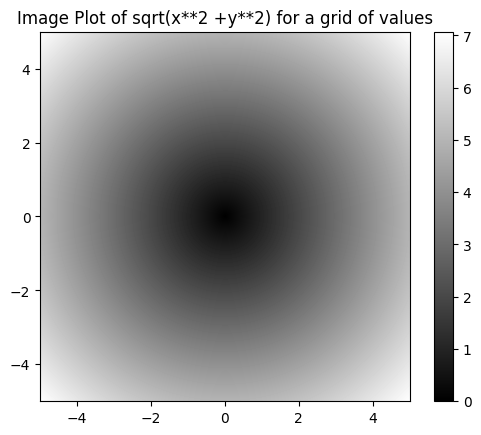

In [192]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.grey, extent=[-5, 5, -5, 5])
plt.colorbar()
plt.title('Image Plot of sqrt(x**2 +y**2) for a grid of values')

### Conditional Logic as Array Operations

In [193]:
# while() provides the same functionality as if x x else y
# Considering the following
x = np.array([1,3,5,7,9])
y = np.array([2,4,6,8,0])
cond = np.array([True, True, False, False, False])
# If cond is True get x else y
result = [(x if c else y) for x,y,c in zip(x,y,cond)]
print(result)
# Same thing
print(np.where(cond, x, y))

[1, 3, 6, 8, 0]
[1 3 6 8 0]


### Mathematical Statistical Methods

In [ ]:
# random normal distribution
arr = rng.standard_normal([5, 4])
print(arr)
# Mean
print('Mean\n')
print(arr.mean(), np.mean(arr))
# Produce mean across the columns
print(arr.mean(axis=1))
# Sum 
print('Sum\n')
print(arr.sum(), np.sum(arr))
# Cumulative sum
print('CumSum\n')
print(arr.cumsum(), np.cumsum(arr))
# Cumulative sum across rows and columns
print(arr.cumsum(axis=0))
print(arr.cumsum(axis=1))

#### Functions Overview

1. **Mean**: Calculates the average of the array elements.
   ```python
   np.mean(array)
   ```

2. **Median**: Finds the median value of the array elements.
   ```python
   np.median(array)
   ```

3. **Standard Deviation**: Measures the spread of the array elements from the mean.
   ```python
   np.std(array)
   ```

4. **Variance**: Calculates the variance of the array elements.
   ```python
   np.var(array)
   ```

5. **Minimum and Maximum**: Finds the minimum and maximum values in the array.
   ```python
   np.min(array)
   np.max(array)
   ```

6. **Sum**: Computes the sum of the array elements.
   ```python
   np.sum(array)
   ```

7. **Product**: Computes the product of the array elements.
   ```python
   np.prod(array)
   ```

8. **Percentile**: Computes the nth percentile of the array elements.
   ```python
   np.percentile(array, n)
   ```

9. **Quantile**: Computes the quantile of the array elements.
   ```python
   np.quantile(array, q)
   ```

10. **Cumulative Sum**: Computes the cumulative sum of the array elements.
    ```python
    np.cumsum(array)
    ```

11. **Cumulative Product**: Computes the cumulative product of the array elements.
    ```python
    np.cumprod(array)
    ```

12. **Correlation Coefficient**: Computes the correlation coefficient matrix.
    ```python
    np.corrcoef(array)
    ```

13. **Covariance Matrix**: Computes the covariance matrix.
    ```python
    np.cov(array)
    ```

These methods can be applied to 1-dimensional arrays as well as multi-dimensional arrays by specifying the `axis` parameter to perform the operation along a specific axis. For example, to compute the mean along the rows (axis 0) of a 2D array:

```python
np.mean(array, axis=0)
```

And to compute the mean along the columns (axis 1):

```python
np.mean(array, axis=1)
```

### Methods For Boolean Arrays

In [194]:
arr = rng.standard_normal(100)
# Sum positivte values
print((arr > 0).sum())
# Negative values
print((arr < 0).sum())

bools = np.array([True, False, True, False])
# Are there any True values?
print(bools.any())
# Are they all True?
print(bools.all())

57
43
True
False


### Sorting

In [195]:
arr = rng.standard_normal(10)
print('Original\n')
print(arr)
arr.sort()
print('Sorted\n')
print(arr)

arr = rng.standard_normal((5, 3))
print('Original\n')
print(arr)
print('Sorted by columns\n')
arr.sort(axis=0)
print(arr)
print('Sorted by rows\n')
arr.sort(axis=1)
print(arr)

Original

[ 0.15826595 -1.09056182 -1.31971594  0.83865147  2.11976386 -0.04957244
  0.32569785 -0.54832337 -0.27031907 -1.67280539]
Sorted

[-1.67280539 -1.31971594 -1.09056182 -0.54832337 -0.27031907 -0.04957244
  0.15826595  0.32569785  0.83865147  2.11976386]
Original

[[ 0.0828318   0.19019274 -0.30820715]
 [ 0.10708834 -0.35698012  1.33752681]
 [-0.076218    0.2633732   0.9609381 ]
 [ 0.19018149  0.40407413 -1.82536616]
 [-0.24890299  1.9144975   0.39060843]]
Sorted by columns

[[-0.24890299 -0.35698012 -1.82536616]
 [-0.076218    0.19019274 -0.30820715]
 [ 0.0828318   0.2633732   0.39060843]
 [ 0.10708834  0.40407413  0.9609381 ]
 [ 0.19018149  1.9144975   1.33752681]]
Sorted by rows

[[-1.82536616 -0.35698012 -0.24890299]
 [-0.30820715 -0.076218    0.19019274]
 [ 0.0828318   0.2633732   0.39060843]
 [ 0.10708834  0.40407413  0.9609381 ]
 [ 0.19018149  1.33752681  1.9144975 ]]


### Unique and Other Set Logic

In [196]:
array1 = np.array([1, 2, 3, 4, 5])
array2 = np.array([4, 5, 6, 7, 8])

# Union
union_result = np.union1d(array1, array2)
print("Union:", union_result)  # Output: [1 2 3 4 5 6 7 8]

# Intersection
intersection_result = np.intersect1d(array1, array2)
print("Intersection:", intersection_result)  # Output: [4 5]

# Difference
difference_result = np.setdiff1d(array1, array2)
print("Difference (array1 - array2):", difference_result)  # Output: [1 2 3]

# Symmetric Difference
symmetric_difference_result = np.setxor1d(array1, array2)
print("Symmetric Difference:", symmetric_difference_result)  # Output: [1 2 3 6 7 8]

# In1d
in1d_result = np.in1d(array1, array2)
print("In1d (elements of array1 in array2):", in1d_result)  # Output: [False False False  True  True]

# Unique
unique_result = np.unique(array1)
print("Unique elements in array1:", unique_result)  # Output: [1 2 3 4 5]

names = np.array(['Bob','Will','Joe','Alice','Will','Bill','John','Bob','George','Joe'])
print(np.unique(names))

Union: [1 2 3 4 5 6 7 8]
Intersection: [4 5]
Difference (array1 - array2): [1 2 3]
Symmetric Difference: [1 2 3 6 7 8]
In1d (elements of array1 in array2): [False False False  True  True]
Unique elements in array1: [1 2 3 4 5]
['Alice' 'Bill' 'Bob' 'George' 'Joe' 'John' 'Will']


#### Functions Overview

1. **Union**: Returns the unique elements that are in either of the input arrays.
   ```python
   np.union1d(array1, array2)
   ```

2. **Intersection**: Returns the unique elements that are common to both input arrays.
   ```python
   np.intersect1d(array1, array2)
   ```

3. **Difference**: Returns the unique elements that are in the first array but not in the second array.
   ```python
   np.setdiff1d(array1, array2)
   ```

4. **Symmetric Difference**: Returns the unique elements that are in either of the input arrays but not in both.
   ```python
   np.setxor1d(array1, array2)
   ```

5. **In1d**: Tests whether each element of a 1-D array is also present in a second array. Returns a boolean array.
   ```python
   np.in1d(array1, array2)
   ```

6. **Unique**: Finds the unique elements of an array.
   ```python
   np.unique(array)
   ```

### File Input and Output with Arrays

Handling file input and output with arrays in NumPy is straightforward and includes several methods to read from and write to files. Here are some of the common methods:

### 1. Saving and Loading Arrays in Binary Format

#### `np.save()`
Saves an array to a binary file in `.npy` format.

```python
import numpy as np

array = np.array([1, 2, 3, 4, 5])
np.save('array.npy', array)
```

#### `np.load()`
Loads an array from a binary `.npy` file.

```python
loaded_array = np.load('array.npy')
print(loaded_array)  # Output: [1 2 3 4 5]
```

#### `np.savez()`
Saves multiple arrays to a single `.npz` file.

```python
array1 = np.array([1, 2, 3])
array2 = np.array([4, 5, 6])
np.savez('arrays.npz', array1=array1, array2=array2)
```

#### `np.load()`
Loads arrays from a `.npz` file.

```python
data = np.load('arrays.npz')
print(data['array1'])  # Output: [1 2 3]
print(data['array2'])  # Output: [4 5 6]
```

### 2. Saving and Loading Arrays in Text Format

#### `np.savetxt()`
Saves an array to a text file.

```python
array = np.array([[1, 2, 3], [4, 5, 6]])
np.savetxt('array.txt', array, delimiter=',')
```

#### `np.loadtxt()`
Loads an array from a text file.

```python
loaded_array = np.loadtxt('array.txt', delimiter=',')
print(loaded_array)  # Output: [[1. 2. 3.]
                     #          [4. 5. 6.]]
```

### 3. Reading and Writing Arrays to/from CSV Files

#### `np.genfromtxt()`
Loads data from a text file, with missing values handled as specified.

```python
array = np.genfromtxt('data.csv', delimiter=',')
print(array)
```

#### `np.savetxt()`
Saves an array to a CSV file.

```python
array = np.array([[1, 2, 3], [4, 5, 6]])
np.savetxt('data.csv', array, delimiter=',')
```

### Example of File Operations

Here’s an example showing how to save and load a NumPy array using both binary and text formats:

```python
import numpy as np

# Create an example array
array = np.array([[10, 20, 30], [40, 50, 60]])

# Save array in binary format
np.save('example_array.npy', array)

# Load array from binary format
loaded_array_binary = np.load('example_array.npy')
print("Loaded from .npy file:", loaded_array_binary)

# Save array in text format (CSV)
np.savetxt('example_array.csv', array, delimiter=',')

# Load array from text format (CSV)
loaded_array_text = np.loadtxt('example_array.csv', delimiter=',')
print("Loaded from .csv file:", loaded_array_text)
```

### Linear Algebra

Please refer to the Notebook "Notes On Vectors And Matrices [Basic Python For Data Science].ipynb"